In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.dynamic_factor import DynamicFactor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

# Đọc dữ liệu từ file CSV
df = pd.read_csv('AMZN.csv')

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Lấy cột "Open", CLose làm biến độc lập
df = df[['Open','Close']]

#Scaler dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))

df1= scaler.fit_transform(df)
# Chia tập dữ liệu training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]
#Xây dụng mô hình
model = DynamicFactor(train_data, k_factors=1, factor_order=3, error_order=3)
# Fit the model
result = model.fit(method='powell', disp=False)

In [85]:
#Quá trình test
predict = result.predict(start=len(train_data), end= len(test_data)+len(train_data)-1)

#Quá trình validate
predict_val = result.predict(start=len(train_data)+len(test_data), end= len(test_data)+len(train_data)+len(val_data)-1)

#Dự đoán 30 ngày tiếp theo
predict_30_days= result.predict(start= len(test_data)+len(train_data)+len(val_data),end= len(test_data)+len(train_data)+len(val_data)+29)

In [86]:
#invert dữ liệu
train_data = scaler.inverse_transform(train_data)
test_data= scaler.inverse_transform(test_data)
val_data = scaler.inverse_transform(val_data)
predict = scaler.inverse_transform(predict)
predict_val = scaler.inverse_transform(predict_val)
predict_30_days= scaler.inverse_transform(predict_30_days)

In [87]:
#Tính RMSE
valid_rmse = np.sqrt(np.mean((predict_val - val_data)**2))
test_rmse = np.sqrt(np.mean((predict - test_data)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 52.94702142230799
Testing RMSE: 29.562633669794064


In [88]:
#Tính MAE
val_mae= mean_absolute_error(val_data, predict_val)
test_mae = mean_absolute_error(test_data, predict)

print('Validation MAE:', val_mae)
print('Testing MAE:', test_mae)

Validation MAE: 51.77234024712688
Testing MAE: 23.805662252776976


In [89]:
train_data_index= pd.RangeIndex(start=0, stop=train_size, step=1)
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
predict_30_days_index= pd.RangeIndex(start=train_size+test_size+val_size, stop=train_size+test_size+val_size+30, step=1)

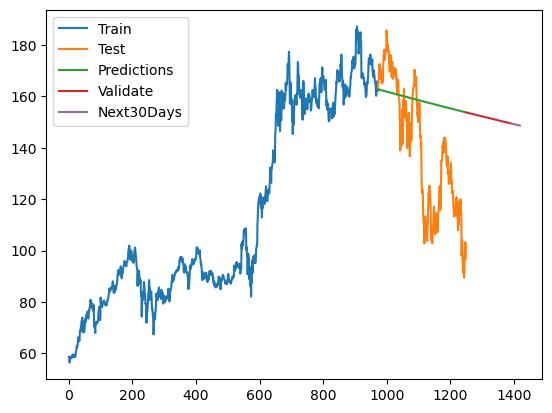

In [90]:
plt.plot(train_data_index,train_data[:,0])
plt.plot(test_data_index,test_data[:,0])
plt.plot(test_data_index,predict[:,0])
plt.plot(val_data_index,predict_val[:,0])
plt.plot(predict_30_days_index,predict_30_days[:,0])
plt.legend(['Train','Test', 'Predictions','Validate','Next30Days'])